In [43]:
import numpy as np
import matplotlib.pyplot as plt

## Lineer Regresyon

In [44]:
simple_f = lambda x: 0.66 + 2.53*x + np.random.randn(*np.array(x).shape)
x = np.random.randn(150)
y = simple_f(x)

## bilinenler
- x
- y

**f(x) -> y fonksiyon bilinmiyor.**

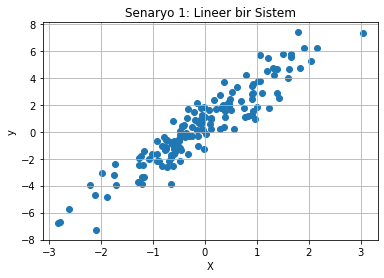

In [45]:
_ = plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Senaryo 1: Lineer bir Sistem')
_ = plt.grid()

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
model = LinearRegression()

In [86]:
# fit
# transform
# predict
model.fit(x.reshape(-1, 1), y)

LinearRegression()

Katsayi ve intersept degeri ($ax + b = y$ | $a:coef\_,\ b:intercept\_$)

In [49]:
model.coef_

array([2.56047987])

In [50]:
model.intercept_

0.6244691886706121

In [51]:
xx = np.linspace(-3, 3, 100)
yy = model.predict(xx.reshape(-1, 1))

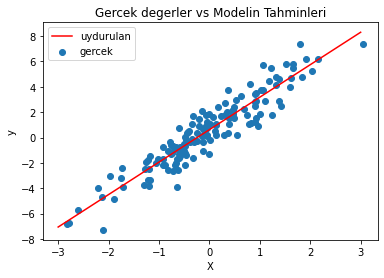

In [52]:
plt.scatter(x, y, label='gercek')
_ = plt.plot(xx, yy, 'r', label='uydurulan')
_ = plt.legend()
plt.xlabel('X')
plt.ylabel('y')
_ = plt.title('Gercek degerler vs Modelin Tahminleri')

In [53]:
y_pred = model.predict(x.reshape(-1, 1))

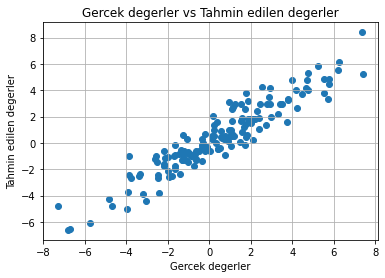

In [54]:
plt.scatter(y, y_pred)
plt.xlabel('Gercek degerler')
_ = plt.ylabel('Tahmin edilen degerler')
plt.grid()
_ = plt.title('Gercek degerler vs Tahmin edilen degerler')

In [55]:
modelin_hatasi = y - y_pred

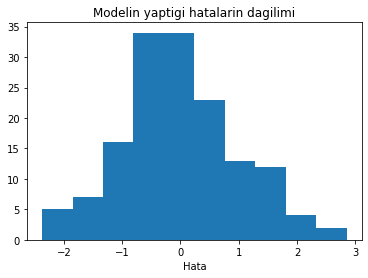

In [56]:
_ = plt.hist(-modelin_hatasi, bins=10)
plt.xlabel('Hata')
_ = plt.title('Modelin yaptigi hatalarin dagilimi')

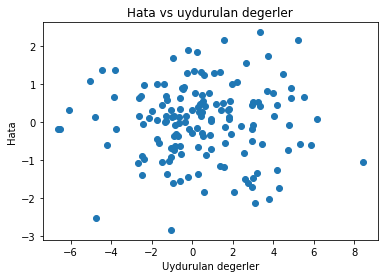

In [57]:
plt.scatter(y_pred, modelin_hatasi)
plt.title('Hata vs uydurulan degerler')
plt.xlabel('Uydurulan degerler')
_ = plt.ylabel('Hata')

Grafikte herhangi bir patern gozlemlenmiyor.

## Polinomiyel Regresyon

Bu senaryoda $f(x)=y$ islemini gerceklestiren $f$ fonksiyonu polinomiyel bir fonksiyon:


$$f(x) = 0.66 + 2.53x - 1.2x^2 + \tilde{N}(0,1)$$

In [58]:
from sklearn.preprocessing import PolynomialFeatures

In [82]:
np.random.randn(15)

array([-3.21958511, -0.27810785, -0.56595258,  0.67944263,  0.83673609,
       -1.33477021, -0.56553131, -0.88413957,  1.46796424, -1.90181134,
        1.07791952,  1.14011641,  0.77043701, -0.40959634, -0.36235047])

In [59]:
x = np.random.randn(150)
simple_f = lambda x: 0.66 + 2.53*x + -1.2*x**2 + np.random.randn(*np.array(x).shape)
y = simple_f(x)

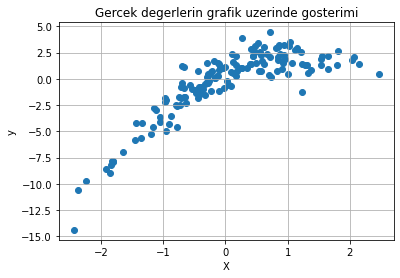

In [60]:
plt.scatter(x, y)
plt.grid()
plt.title('Gercek degerlerin grafik uzerinde gosterimi')
plt.xlabel('X')
_ = plt.ylabel('y')

In [61]:
model = LinearRegression()

In [62]:
# fit
# transform
# predict
model.fit(
    x.reshape(-1, 1),
    y
)

LinearRegression()

In [63]:
xx = np.linspace(-3, 3, 100)
yy = model.predict(xx.reshape(-1, 1))

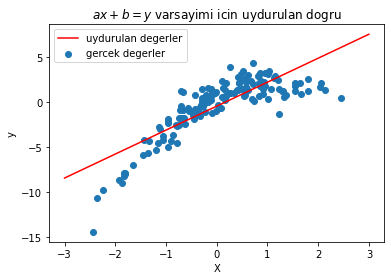

In [64]:
plt.scatter(x, y, label='gercek degerler')
plt.title('$ax + b = y$ varsayimi icin uydurulan dogru')
plt.xlabel('X')
plt.ylabel('y')
_ = plt.plot(xx, yy, 'r', label='uydurulan degerler')
_ = plt.legend()


In [65]:
y_pred = model.predict(x.reshape(-1, 1))

In [84]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [85]:
print('r2:', r2_score(y_test,y_pred))
print('MAE:', mean_absolute_error(y_test,y_pred))
print('MSE:', mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))

NameError: name 'y_test' is not defined

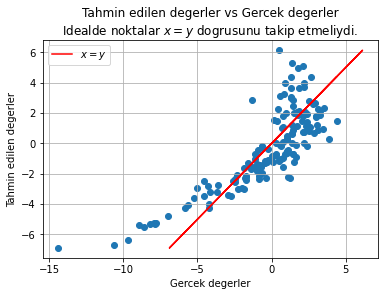

In [66]:
plt.scatter(y, y_pred)
plt.plot(y_pred, y_pred, color='red', label='$x=y$')
plt.xlabel('Gercek degerler')
plt.grid()
plt.legend()
plt.title('Tahmin edilen degerler vs Gercek degerler\nIdealde noktalar $x=y$ dogrusunu takip etmeliydi.')
_ = plt.ylabel('Tahmin edilen degerler')

In [67]:
modelin_hatasi = y - y_pred

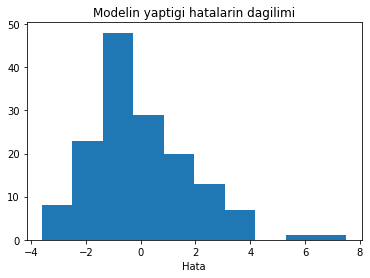

In [68]:
_ = plt.hist(-modelin_hatasi, bins=10)
plt.xlabel('Hata')
_ = plt.title('Modelin yaptigi hatalarin dagilimi')

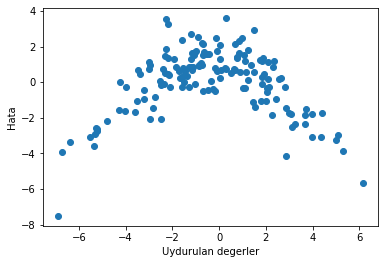

In [69]:
plt.scatter(y_pred, modelin_hatasi)
plt.xlabel('Uydurulan degerler')
_ = plt.ylabel('Hata')

Grafikte acik bir sekilde patern gorulmektedir.
modelimizin varsayimlari hatali/yetersiz

In [70]:
DEG = 3
transformator = PolynomialFeatures(DEG, include_bias=False)

transformator.fit(x.reshape(-1, 1))
xp = transformator.transform(x.reshape(-1 , 1))

model_p = LinearRegression()

model_p.fit(xp, y)
model_p.score(xp, y)

0.8973541327714197

In [71]:
xx = np.linspace(x.min(), x.max(), 1000)
yy = model_p.predict(
    transformator.transform(xx.reshape(-1, 1))
                    )

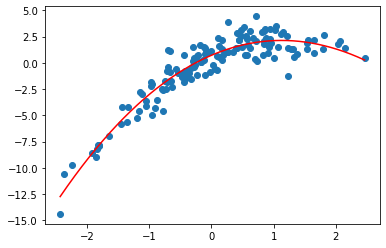

In [72]:
plt.scatter(x, y)
_ = plt.plot(xx, yy, color='red')

In [73]:
y_pred = model_p.predict(transformator.transform(x.reshape(-1, 1)))

In [74]:
# simple_f = lambda x: 0.66 + 2.53*x + -1.2*x**2 + np.random.randn(*np.array(x).shape)

In [75]:
model_p.coef_

array([ 2.54140409, -1.17168185,  0.0259084 ])

In [76]:
model_p.intercept_

0.7171071286486749

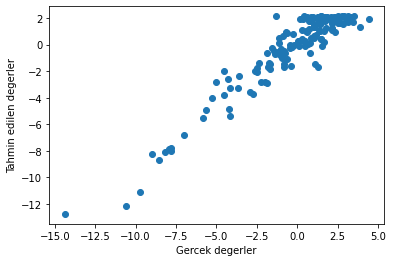

In [77]:
plt.scatter(y, y_pred)
plt.xlabel('Gercek degerler')
_ = plt.ylabel('Tahmin edilen degerler')

In [78]:
modelin_hatasi = y - y_pred

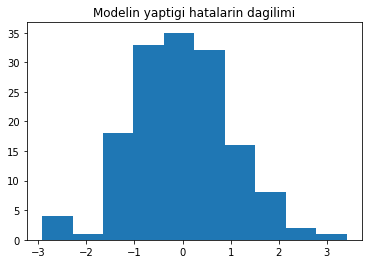

In [79]:
_ = plt.hist(-modelin_hatasi, bins=10)
_ = plt.title('Modelin yaptigi hatalarin dagilimi')

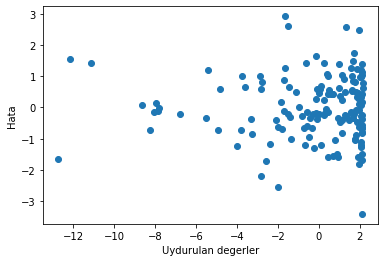

In [80]:
plt.scatter(y_pred, modelin_hatasi)
plt.xlabel('Uydurulan degerler')
_ = plt.ylabel('Hata')

grafikte herhangi bir gozukmuyor; olumlu bir isaret.

In [1]:
import numpy as np
def entropy(p):
	return -(p * np.log2(p) + (1-p) * np.log2((1-p)))
entropy(0.95)

0.2863969571159563

In [2]:
from scipy import stats
stats.entropy([0.95,0.05], base = 2)

0.2863969571159562

In [3]:
def relative_entropy(p, q):
    return sum(p[i] * np.log2(p[i]/q[i]) for i in range(len(p)))
relative_entropy([0.95,0.05], [0.2,0.8])

1.9355311377714057

In [4]:
stats.entropy(pk = [0.95,0.05], qk = [0.2,0.8], base=2)

1.9355311377714057

In [5]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import mutual_info_score
a = np.array([1, 1, 1, 0, 0, 1, 0, 0, 0, 1])
b = np.array([1, 1, 1, 0, 0, 1, 0, 0, 0, 1])

print(stats.entropy([0.5,0.5])) # entropy of 0.69, expressed in nats
print(mutual_info_classif(a.reshape(-1,1), b, discrete_features = True)) # mutual information of 0.69, expressed in nats
print(mutual_info_score(a,b)) # information gain of 0.69, expressed in nats

0.6931471805599453
[0.69314718]
0.6931471805599456
